In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
train_datagen=ImageDataGenerator(rescale=1./255,zoom_range=0.2,horizontal_flip=True,vertical_flip=False)
test_datagen=ImageDataGenerator(rescale=1./255)

In [3]:
x_train=train_datagen.flow_from_directory(r"C:\project\Fertilizers_Recommendation_ System_For_Disease_ Prediction\Dataset Plant Disease\Veg-dataset\Veg-dataset\train_set",target_size=(128,128),
                                        class_mode='categorical',batch_size=24)

Found 11386 images belonging to 9 classes.


In [4]:
x_test=test_datagen.flow_from_directory(r"C:\project\Fertilizers_Recommendation_ System_For_Disease_ Prediction\Dataset Plant Disease\Veg-dataset\Veg-dataset\test_set",target_size=(128,128),
                                        class_mode='categorical',batch_size=24)

Found 3416 images belonging to 9 classes.


In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Convolution2D,MaxPooling2D,Flatten

In [6]:
model=Sequential()

In [7]:
model.add(Convolution2D(32,(3,3),input_shape=(128,128,3),activation='relu'))

In [8]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [9]:
model.add(Flatten())

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 127008)            0         
                                                                 
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.add(Dense(300,activation='relu'))
model.add(Dense(150,activation='relu'))

In [12]:
model.add(Dense(9,activation='softmax'))

In [13]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
len(x_train)

475

In [14]:
1238/24

51.583333333333336

In [15]:
model.fit(x_train,steps_per_epoch=len(x_train),validation_data=x_test,validation_steps=len(x_test),epochs=10)

Epoch 1/10
475/475 [==============================] - 275s 570ms/step - loss: 1.4510 - accuracy: 0.5898 - val_loss: 0.7129 - val_accuracy: 0.7351
Epoch 2/10
475/475 [==============================] - 274s 577ms/step - loss: 0.5901 - accuracy: 0.7919 - val_loss: 0.6282 - val_accuracy: 0.7878
Epoch 3/10
475/475 [==============================] - 273s 575ms/step - loss: 0.4647 - accuracy: 0.8352 - val_loss: 0.4685 - val_accuracy: 0.8308
Epoch 4/10
475/475 [==============================] - 272s 572ms/step - loss: 0.3873 - accuracy: 0.8679 - val_loss: 0.3700 - val_accuracy: 0.8741
Epoch 5/10
475/475 [==============================] - 241s 508ms/step - loss: 0.3219 - accuracy: 0.8864 - val_loss: 0.2255 - val_accuracy: 0.9207
Epoch 6/10
475/475 [==============================] - 249s 524ms/step - loss: 0.2912 - accuracy: 0.8986 - val_loss: 0.2228 - val_accuracy: 0.9151
Epoch 7/10
475/475 [==============================] - 252s 531ms/step - loss: 0.2545 - accuracy: 0.9109 - val_loss: 0.3127 -

In [16]:
model.save('vegetabledata.h5')

In [17]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [18]:
model=load_model('vegetabledata.h5')

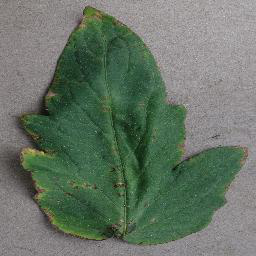

In [19]:
img=image.load_img(r"C:\project\Fertilizers_Recommendation_ System_For_Disease_ Prediction\Dataset Plant Disease\Veg-dataset\Veg-dataset\test_set\Tomato___Bacterial_spot\b16f21dc-39eb-45b5-a588-da778fa9ac44___GCREC_Bact.Sp 6351.JPG")
img

In [20]:
x=image.img_to_array(img)

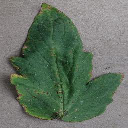

In [22]:
img=image.load_img(r"C:\project\Fertilizers_Recommendation_ System_For_Disease_ Prediction\Dataset Plant Disease\Veg-dataset\Veg-dataset\test_set\Tomato___Bacterial_spot\b16f21dc-39eb-45b5-a588-da778fa9ac44___GCREC_Bact.Sp 6351.JPG",target_size=(128,128))
img



In [23]:
x=image.img_to_array(img)

In [24]:
x

array([[[136., 131., 128.],
        [126., 121., 118.],
        [127., 122., 119.],
        ...,
        [163., 161., 162.],
        [169., 167., 168.],
        [162., 160., 161.]],

       [[150., 145., 142.],
        [140., 135., 132.],
        [133., 128., 125.],
        ...,
        [177., 175., 176.],
        [165., 163., 164.],
        [178., 176., 177.]],

       [[133., 128., 125.],
        [118., 113., 110.],
        [127., 122., 119.],
        ...,
        [172., 170., 171.],
        [175., 173., 174.],
        [168., 166., 167.]],

       ...,

       [[144., 140., 141.],
        [129., 125., 126.],
        [152., 148., 149.],
        ...,
        [142., 140., 143.],
        [143., 141., 144.],
        [138., 136., 139.]],

       [[130., 126., 127.],
        [131., 127., 128.],
        [128., 124., 125.],
        ...,
        [142., 140., 143.],
        [143., 141., 144.],
        [146., 144., 147.]],

       [[130., 126., 127.],
        [150., 146., 147.],
        [131., 1

In [25]:
x=np.expand_dims(x,axis=0)

In [26]:
x

array([[[[136., 131., 128.],
         [126., 121., 118.],
         [127., 122., 119.],
         ...,
         [163., 161., 162.],
         [169., 167., 168.],
         [162., 160., 161.]],

        [[150., 145., 142.],
         [140., 135., 132.],
         [133., 128., 125.],
         ...,
         [177., 175., 176.],
         [165., 163., 164.],
         [178., 176., 177.]],

        [[133., 128., 125.],
         [118., 113., 110.],
         [127., 122., 119.],
         ...,
         [172., 170., 171.],
         [175., 173., 174.],
         [168., 166., 167.]],

        ...,

        [[144., 140., 141.],
         [129., 125., 126.],
         [152., 148., 149.],
         ...,
         [142., 140., 143.],
         [143., 141., 144.],
         [138., 136., 139.]],

        [[130., 126., 127.],
         [131., 127., 128.],
         [128., 124., 125.],
         ...,
         [142., 140., 143.],
         [143., 141., 144.],
         [146., 144., 147.]],

        [[130., 126., 127.],
       

In [27]:
y=np.argmax(model.predict(x),axis=1)

1/1 [==============================] - 0s 456ms/step


In [28]:
x_train.class_indices

{'Pepper,_bell___Bacterial_spot': 0,
 'Pepper,_bell___healthy': 1,
 'Potato___Early_blight': 2,
 'Potato___Late_blight': 3,
 'Potato___healthy': 4,
 'Tomato___Bacterial_spot': 5,
 'Tomato___Late_blight': 6,
 'Tomato___Leaf_Mold': 7,
 'Tomato___Septoria_leaf_spot': 8}

In [48]:
index=['Pepper,_bell___Bacterial_spot','Pepper,_bell___healthy','Potato___Early_blight','Potato___Late_blight','Potato___healthy','Tomato___Septoria_leaf_spot','Tomato___Late_blight','Tomato___Leaf_Mold','Tomato___Bacterial_spot']
index[y[0]]

'Tomato___Bacterial_spot'

In [49]:
img=image.load_img(r"C:\project\Fertilizers_Recommendation_ System_For_Disease_ Prediction\Dataset Plant Disease\Veg-dataset\Veg-dataset\test_set\Tomato___Bacterial_spot\b16f21dc-39eb-45b5-a588-da778fa9ac44___GCREC_Bact.Sp 6351.JPG",target_size=(128,128))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
y=np.argmax(model.predict(x),axis=1)
index=['Pepper,_bell___Bacterial_spot','Pepper,_bell___healthy','Potato___Early_blight','Potato___Late_blight','Potato___healthy','Tomato___Late_blight','Tomato___Leaf_Mold','Tomato___Septoria_leaf_spot','Tomato___Bacterial_spot']
index[y[0]]

1/1 [==============================] - 0s 78ms/step


'Tomato___Bacterial_spot'

In [50]:
index=['Pepper,_bell___Bacterial_spot','Pepper,_bell___healthy','Potato___Early_blight','Potato___Late_blight','Potato___healthy','Tomato___Late_blight','Tomato___Leaf_Mold','Tomato___Septoria_leaf_spot','Tomato___Bacterial_spot']

In [51]:
index[y[0]]

'Tomato___Bacterial_spot'